# 作業

以正確的副檔名下載網頁中的圖片
範例網頁:https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html

Note：因為 PTT 會詢問「是否滿 18 歲」，這邊可以用 cookies 繞過

`requests.get(URL, cookies={'over18': '1'}`


In [1]:
import requests
import os

from bs4 import BeautifulSoup
from PIL import Image

In [2]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

In [30]:
# 決定要儲存的資料夾
output_dir = 'downloads'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag
image_tags = soup.find_all('a',rel="nofollow")
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag.string:
        continue
    # 組合圖片而非網站的網址
    image_url = img_tag.string + '.jpg'
    img_id = img_tag.string.split('/')[-1]
    
    # 對圖片送出請求
    with requests.get(image_url, stream=True) as r:
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
        outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))

Save image downloads/Cgb5oo1.jpeg
Save image downloads/MgjHY4f.jpeg
Save image downloads/yeoRtAs.jpeg
Save image downloads/wsauNEW.jpeg
Save image downloads/IjiETcs.jpeg


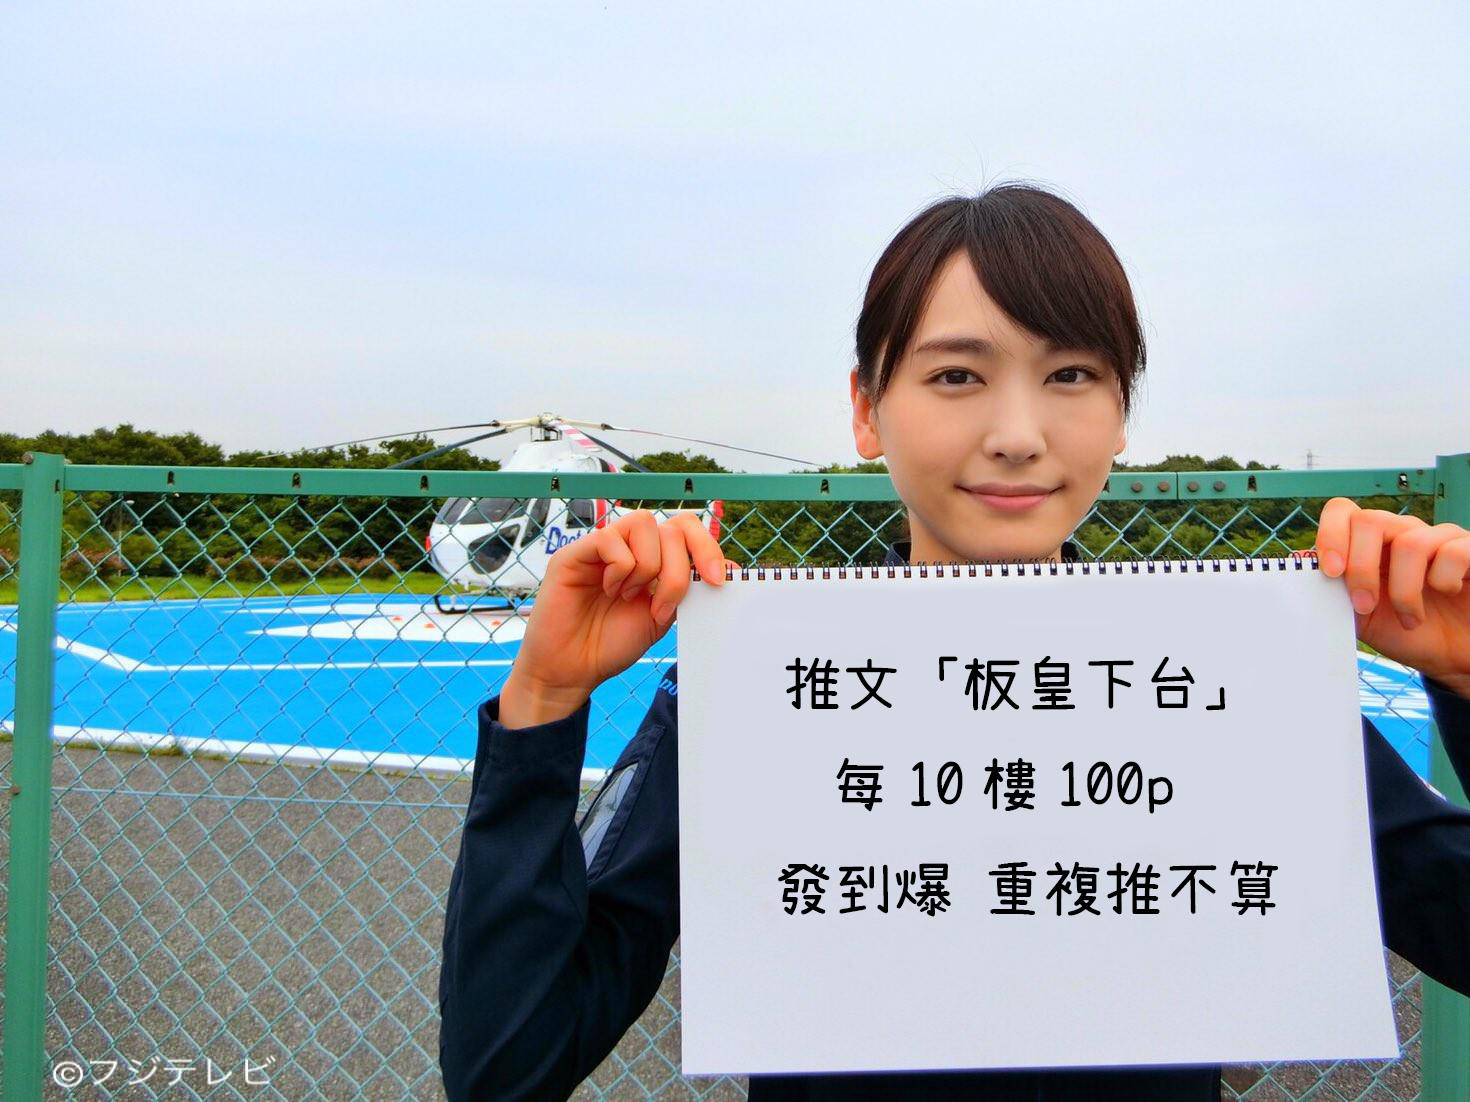

In [31]:
img